<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

In [174]:
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Первые несколько рядов таблицы:

In [175]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


**В выборке есть выбросы:**

In [176]:
Freedom.isnull().sum()

0

**Создаем новый датасет без них:**

In [177]:
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [178]:
df1 = df[df['Country (region)'] != 'Qatar']
df1.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Построила два графика, и на втором нагляднее видно, что данная выборка далека от нормального распределения, а имеет равномерное непрерывное распределение:

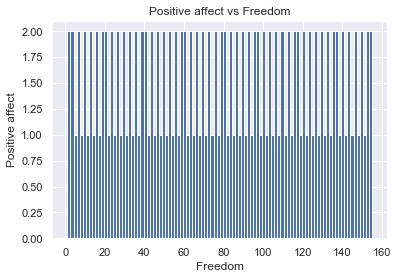

In [179]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df1['Positive affect'], 100, facecolor='b')

plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Positive affect vs Freedom')
plt.grid(True)
plt.show()

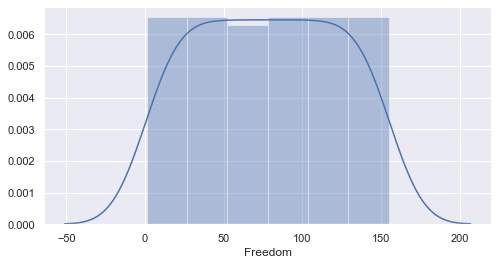

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = df1['Freedom']
ax = sns.distplot(x)
plt.show()

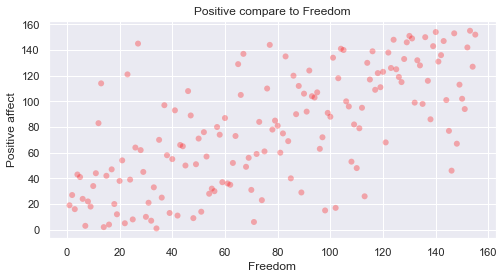

In [181]:
Freedom = df1['Freedom']
Positive_affect = df1['Positive affect']
fig, ax = plt.subplots()
ax.scatter(Freedom, Positive_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Positive compare to Freedom')
plt.show()

**Мат. ожидание:**

In [130]:
statistics.mean(df1['Freedom'])

78.0

In [131]:
sum(df1['Freedom'])/len(df1['Freedom'])

78.0

**Медиана (кодом и встроенной функцией):**

In [183]:
freedom = df1['Freedom']

num_freedom = len(freedom)

sorted_freedom = sorted(freedom)

middle = (num_freedom // 2)
if num_freedom%2==0:
  result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
  result = sorted_freedom[middle]

print('Медиана: ', result)

Медиана:  78.0


In [184]:
print('Медиана: ', statistics.median(df1['Freedom']))

Медиана:  78.0


**Стандартное отклонение:**

In [185]:
statistics.pstdev(Freedom)

44.74371464239419

**Дисперсия:**

In [186]:
statistics.pvariance(Freedom)

2002.0

**Минимальное и максимальные значения, разброс:**

In [187]:
min(Freedom)

1.0

In [188]:
max(Freedom)

155.0

In [189]:
max(Freedom) - min(Freedom)

154.0

**Мода: так как данная выборка содержит более одной моды, посчитать с помощью стандартного библиотечного запроса невозможно. Только с помощью кода**

In [190]:
freedom_counts = {}
for f in freedom:
    if f not in freedom_counts:
        freedom_counts[f] = 1
    else:
        freedom_counts[f] += 1

maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [192]:
print('Значение моды: ', statistics.mode(freedom))

StatisticsError: no unique mode; found 155 equally common values

**Значение коэффициента в корреляции Пирсона говорит о том, что существует прямая корреляция между показателями Freedom и positive affect:**

0.6817698430601657


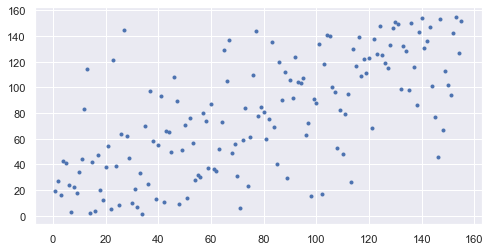

In [193]:
from scipy.stats import pearsonr

freedom = df1['Freedom']
positive_affect = df1['Positive affect']

corr, p_value = pearsonr(freedom, positive_affect)
plt.scatter(freedom, positive_affect, marker='.')
print(corr)

Данные колонки Freedom нормализованы:

In [194]:
freedom = df1['Freedom']
print(statistics.mean(freedom))

78.0


In [195]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [196]:
min(freedom_1)

-77.0

In [197]:
max(freedom_1)

77.0

In [198]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


**Матрица корреляций для всех колонок таблицы:**

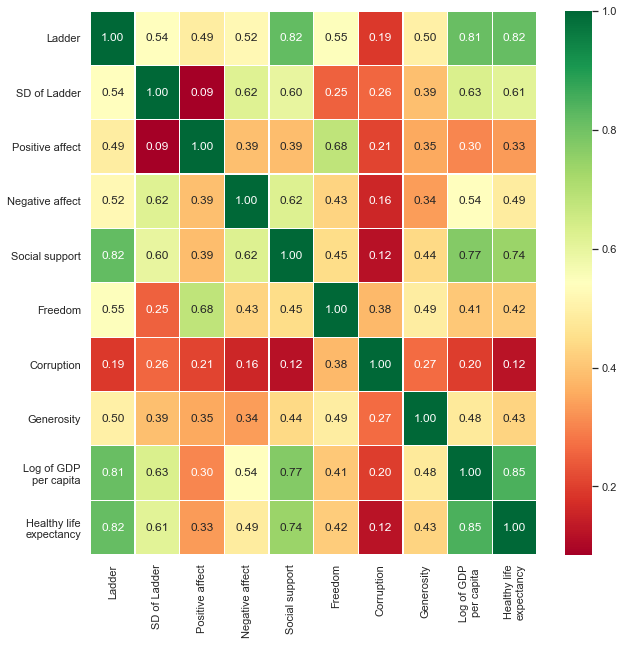

In [199]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True,linewidths=0.2,fmt='.2f',cmap='RdYlGn')
plt.show()